# Relatório Intermediário - Alinhamento de Sequencias de DNA
### Super Computação
Aluna: Ana Clara Carneiro de Freitas

Este projeto foi desenvolvido com o intuito de testar e desenvolver diversas estratégias para realizar o alinhamento de sequências de DNA, o qual consiste em comparar duas sequências de bases para observar seu nível de similaridade. Tal similaridade é calculada por meio dos acertos (matchs), os quais contribuem com um sinal positivo nessa similaridade, e dos erros (gaps e mismatchs), que contribuem negativamente.

Dessa maneira, visando encontrar um alinhamento que maximize esse nível de similaridade, foram implementadas três estratégias, sendo elas uma Solução Heurística, uma Busca Local e, por fim, uma Busca Exaustiva.

---------------------
### Solução Heurística de Alinhamento Local de Smith-Waterman

A primeira estratégia implementada foi a heurística, a qual realiza seu  alinhamento de sequências de DNA por meio do algoritmo smith-waterman. 

In [10]:
import subprocess
import time

def roda_com_entrada(ex, in_f):
    with open(in_f) as f:
        start = time.perf_counter()
        proc = subprocess.run([ex], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()

    return proc.stdout, end-start

In [9]:
valores_n = []

In [11]:
import random

for i in range(5,605,10):
    for j in range(0, 30):
        random.seed(10)
        n = i # tamanho da primeira sequência
        m = random.randint(i,650) # tamanho da segunda sequência
        valores_n.append(n)

        file = './Entradas/input'+ str(i) + '_'+ str(j)# nome do arquivo a ser gerado
        f = open(file, 'w')
        seq=[str(n)+'\n',
            str(m)+'\n',
            ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
            ''.join(random.choices(['A','T','C','G','-'],k=m))]
        f.writelines(seq)
        f.close()

In [92]:
arqs = [f'./Entradas/input{i}' for i in valores_n]

In [93]:
tempos_sw = [roda_com_entrada('./Smith-Waterman/main', arq)[1] for arq in arqs]

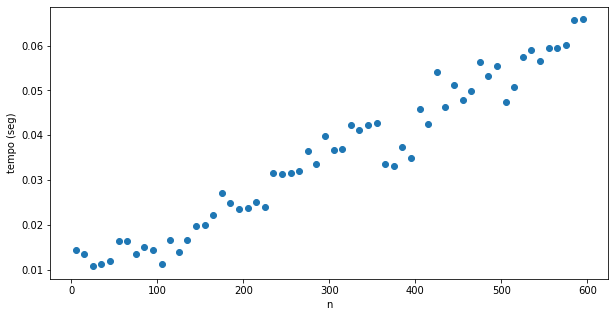

In [94]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('n')
ax.set_ylabel('tempo (seg)')
ax.scatter(valores_n, tempos_sw)
plt.show()

------------------------------
### Algoritmo Local para Alinhamento

In [95]:
tempos_buscaLocal = [roda_com_entrada('./BuscaLocal/main', arq)[1] for arq in arqs]

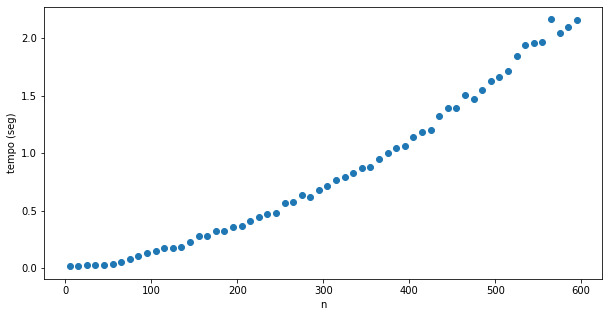

In [96]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('n')
ax.set_ylabel('tempo (seg)')
ax.scatter(valores_n, tempos_buscaLocal)
plt.show()

---------------------
### Busca Exaustiva para Alinhamento de Sequencias utilizando a estratégia de alinhamento Local de Smith-Waterman

In [97]:
n_exaustivo = []

In [98]:
for i in range(5,50,10):
    random.seed(10)
    n = i # tamanho da primeira sequência
    m = random.randint(i,50) # tamanho da segunda sequência
    n_exaustivo.append(n)

    file = './Entradas/input_exaustiva'+ str(i) # nome do arquivo a ser gerado
    f = open(file, 'w')
    seq=[str(n)+'\n',
        str(m)+'\n',
        ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
        ''.join(random.choices(['A','T','C','G','-'],k=m))]
    f.writelines(seq)
    f.close()

In [99]:
arqs_exaustivo = [f'./Entradas/input_exaustiva{i}' for i in n_exaustivo]

In [100]:
tempos_exaust_sw = [roda_com_entrada('./BuscaExaustiva/main_sw', arq)[1] for arq in arqs_exaustivo]

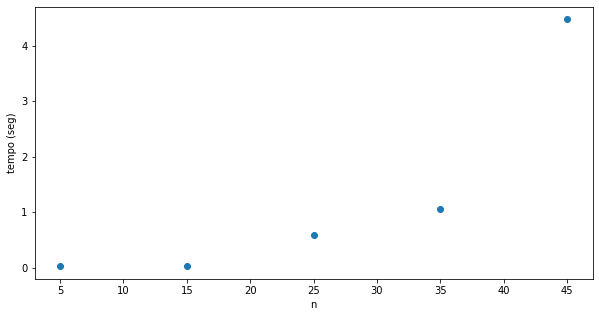

In [101]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('n')
ax.set_ylabel('tempo (seg)')
ax.scatter(n_exaustivo, tempos_exaust_sw)
plt.show()

---------------------
### Busca Exaustiva para Alinhamento de Sequencias utilizando a estratégia de truncamento

In [102]:
n_exaustivo_trunc = []

In [106]:
for i in range(5,200,10):
    random.seed(10)
    n = i # tamanho da primeira sequência
    m = random.randint(i,200) # tamanho da segunda sequência
    n_exaustivo_trunc.append(n)

    file = './Entradas/input_exaustiva_trunc'+ str(i) # nome do arquivo a ser gerado
    f = open(file, 'w')
    seq=[str(n)+'\n',
        str(m)+'\n',
        ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
        ''.join(random.choices(['A','T','C','G','-'],k=m))]
    f.writelines(seq)
    f.close()
    # print(''.join(seq))

In [109]:
arqs_exaustivo_trunc = [f'./Entradas/input_exaustiva_trunc{i}' for i in n_exaustivo_trunc]

In [110]:
tempos_exaust_trunc = [roda_com_entrada('./BuscaExaustiva/main_trunc', arq)[1] for arq in arqs_exaustivo_trunc]

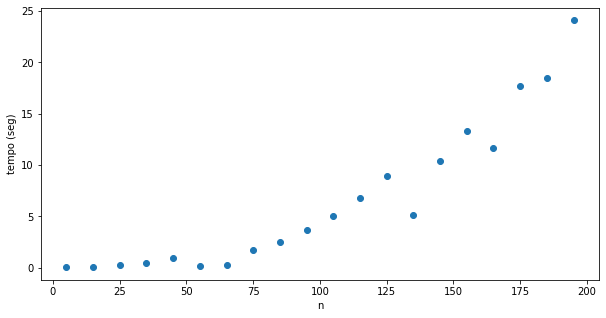

In [111]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('n')
ax.set_ylabel('tempo (seg)')
ax.scatter(n_exaustivo_trunc, tempos_exaust_trunc)
plt.show()

---------------------
### Conclusão

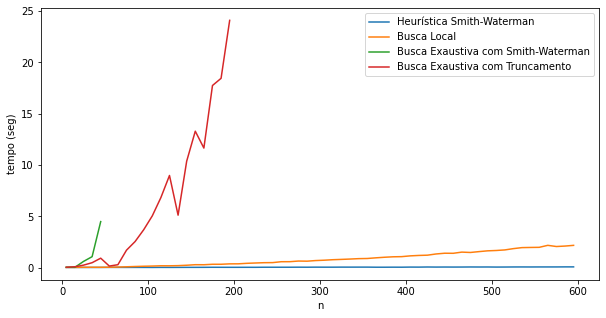

In [115]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('n')
ax.set_ylabel('tempo (seg)')
ax.plot(valores_n, tempos_sw, label='Heurística Smith-Waterman')
plt.plot(valores_n, tempos_buscaLocal, label='Busca Local')
ax.plot(n_exaustivo, tempos_exaust_sw, label='Busca Exaustiva com Smith-Waterman')
plt.plot(n_exaustivo_trunc, tempos_exaust_trunc, label='Busca Exaustiva com Truncamento')
plt.legend()
plt.show()

Para comparar os scores de cada uma das estratégias, foi utilizado a mesma entrada em cada uma delas para realizar a comparação:
```
    tamanho da primeira sequencia (n): 15
    tamanho da segunda sequencia (m): 60
    primeira sequencia: CATGTAAC-CTGAGA
    segunda sequencia: -CTT-CTT-G-A-CGTGGTTA--CAATA--T-CAGTCAGTCGCATAA---CG--ACGCA-
```

In [7]:
from tabulate import tabulate
print(tabulate({'Estratégias': ['Heurística', 'Busca Local', 'Busca Exaustiva - SW', 'Busca Exaustiva - truncamento'], 'Sequencia A utilizada': ['CA-T-G--TAA-C-CTG--A-G-A', 'CATGTAAC-CTGAGA', 'CATGTAAC-CTGAGA', 'GTAAC-C'], 'Sequencia B utilizada': ['CAGTCGCATAA---C-G--ACGCA', 'GTCAGTCGCATAA--', '-CTT-CTT-G-A-CGTGGTTA--CAATA--T-CAGTCAGTCGCATAA---CG--ACGCA', 'GTTA--C'], 'High Score': [15, 11, 15, 8]}, headers="keys", tablefmt='fancy_grid', missingval='N/A'))

╒═══════════════════════════════╤══════════════════════════╤═════════════════════════════════════════════════════════════╤══════════════╕
│ Estratégias                   │ Sequencia A utilizada    │ Sequencia B utilizada                                       │   High Score │
╞═══════════════════════════════╪══════════════════════════╪═════════════════════════════════════════════════════════════╪══════════════╡
│ Heurística                    │ CA-T-G--TAA-C-CTG--A-G-A │ CAGTCGCATAA---C-G--ACGCA                                    │           15 │
├───────────────────────────────┼──────────────────────────┼─────────────────────────────────────────────────────────────┼──────────────┤
│ Busca Local                   │ CATGTAAC-CTGAGA          │ GTCAGTCGCATAA--                                             │           11 │
├───────────────────────────────┼──────────────────────────┼─────────────────────────────────────────────────────────────┼──────────────┤
│ Busca Exaustiva - SW          │ 